In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [8]:
#Loading the dataset
df=pd.read_csv("/content/parkinsons.data")
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
#no of rows and columns in the dataset
print(df.shape)

(195, 24)


In [14]:
df["status"].value_counts()



status
1    147
0     48
Name: count, dtype: int64

In [17]:
#Pre-Processing the data
#as no null values present in the dataset - no nedd of pre processing
df.isnull().value_counts()

name   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  NHR    HNR    status  RPDE   DFA    spread1  spread2  D2     PPE  
False  False        False         False         False           False             False     False     False       False         False             False         False         False     False        False  False  False   False  False  False    False    False  False    195
Name: count, dtype: int64

In [19]:
pip install seaborn

In [ ]:
#dropping the name column which is not necessary for the further implementation
df = df.drop('name', axis=1)

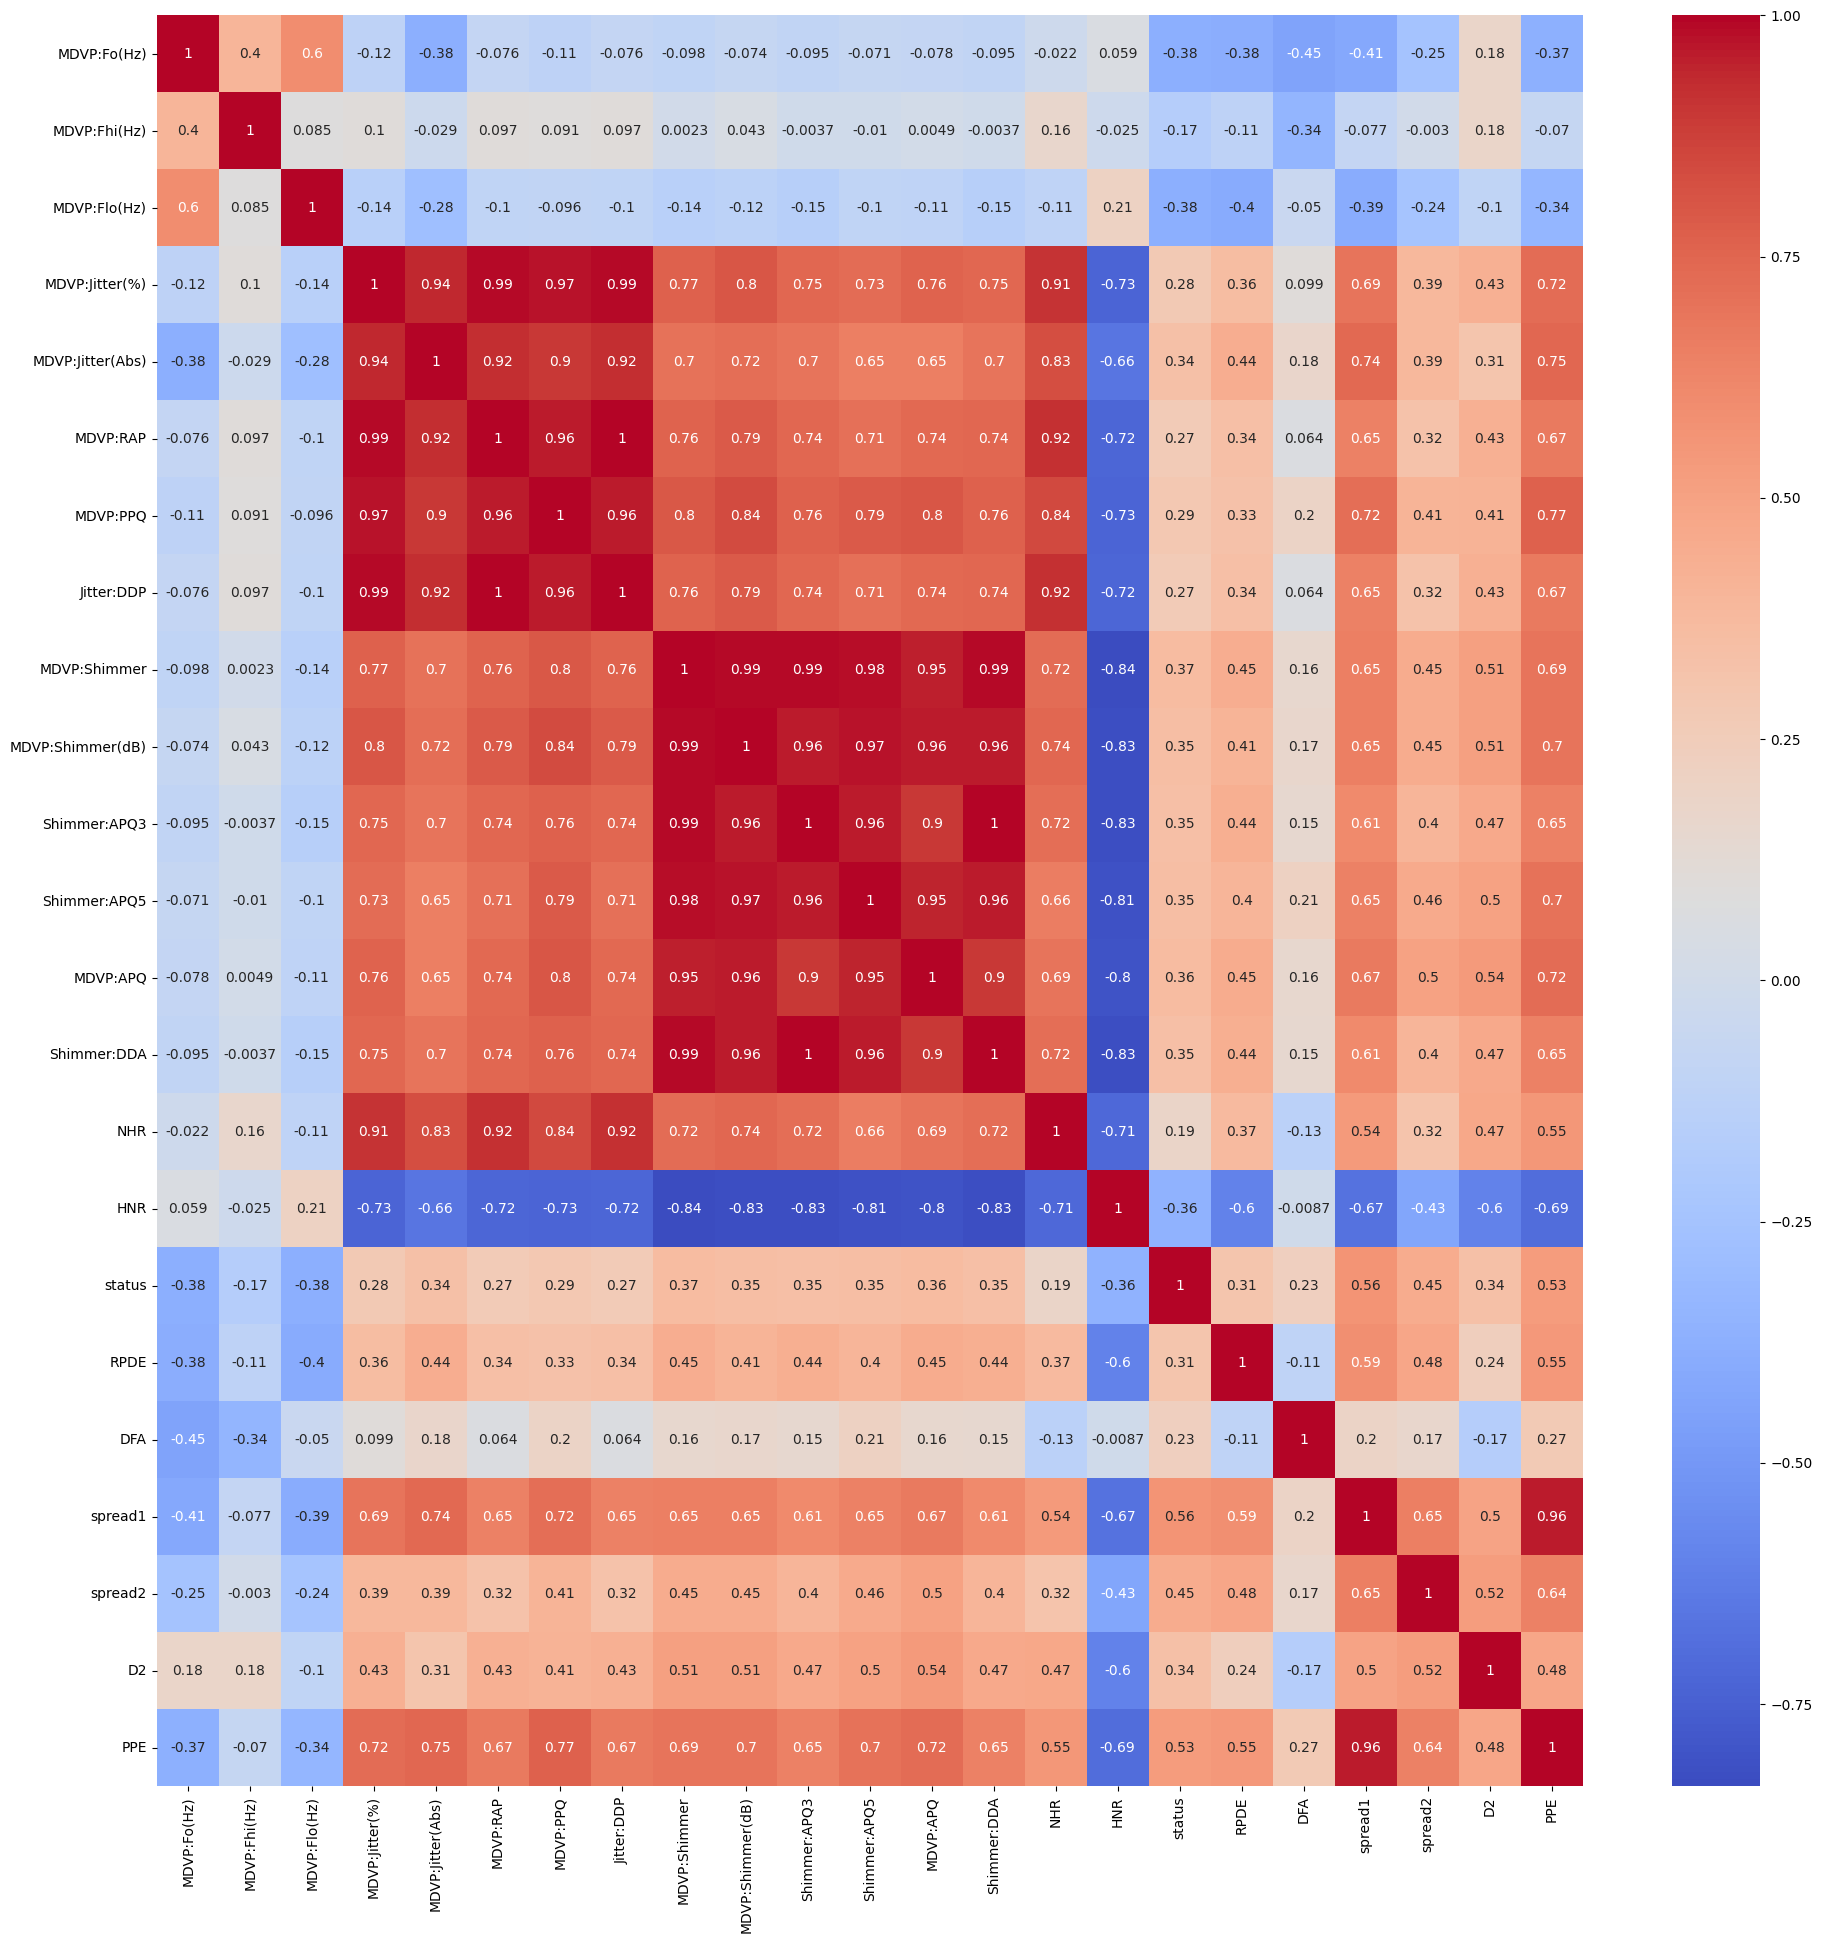

In [38]:
#Feature Engineering techniques

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# applying heatmap to find correlation values between each columns as the darkers color shows that those two columns are highly correlated
#based on the lighter color , decrease the number of features for optimal model

heat_corr_matrix = df.corr()

plt.figure(figsize=(23, 23))

sns.heatmap(heat_corr_matrix, cmap='coolwarm', annot=True)

plt.show()




In [51]:

#reducing the features from 23 to 8
data=pd.DataFrame(df,columns=["MDVP:Fo(Hz)","MDVP:Shimmer","Shimmer:APQ3","HNR","status" ,"RPDE","DFA","PPE"])
print(data)

     MDVP:Fo(Hz)  MDVP:Shimmer  Shimmer:APQ3     HNR  status      RPDE  \
0        119.992       0.04374       0.02182  21.033       1  0.414783   
1        122.400       0.06134       0.03134  19.085       1  0.458359   
2        116.682       0.05233       0.02757  20.651       1  0.429895   
3        116.676       0.05492       0.02924  20.644       1  0.434969   
4        116.014       0.06425       0.03490  19.649       1  0.417356   
..           ...           ...           ...     ...     ...       ...   
190      174.188       0.04087       0.02336  19.517       0  0.448439   
191      209.516       0.02751       0.01604  19.147       0  0.431674   
192      174.688       0.02308       0.01268  17.883       0  0.407567   
193      198.764       0.02296       0.01265  19.020       0  0.451221   
194      214.289       0.01884       0.01026  21.209       0  0.462803   

          DFA       PPE  
0    0.815285  0.284654  
1    0.819521  0.368674  
2    0.825288  0.332634  
3    0.

status
1    38
0    11
Name: count, dtype: int64


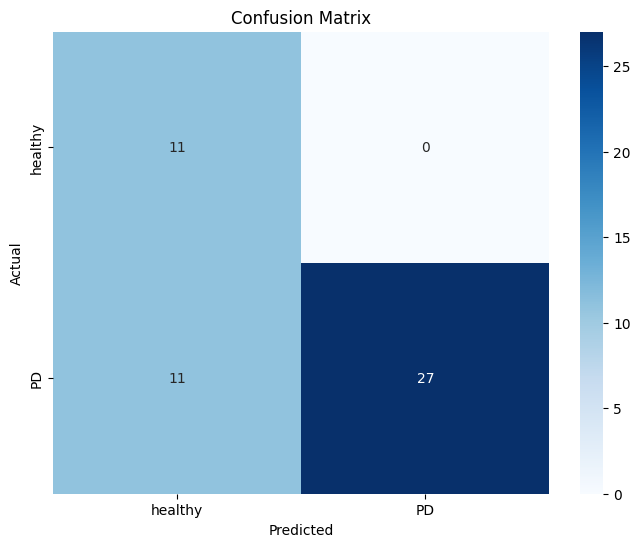

11
Accuracy: 0.7755102040816326
F1 Score: 0.7570905285191


In [78]:
#Naive Bayes Classifier
from sklearn.model_selection import train_test_split
#y as target feature
y=data['status']
#x as all other features that are affecting the target value
x=data.drop('status', axis=1)

#splitting the training and testing dataset as 75 and 25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
#fitting
classifier.fit(x_train, y_train)

#predicting
y_pred = classifier.predict(x_test)
print(y_test.value_counts())
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['healthy', 'PD'], yticklabels=['healthy', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


false_val=(y_pred!=y_test).sum()
print(false_val)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)
#ACCURACY
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

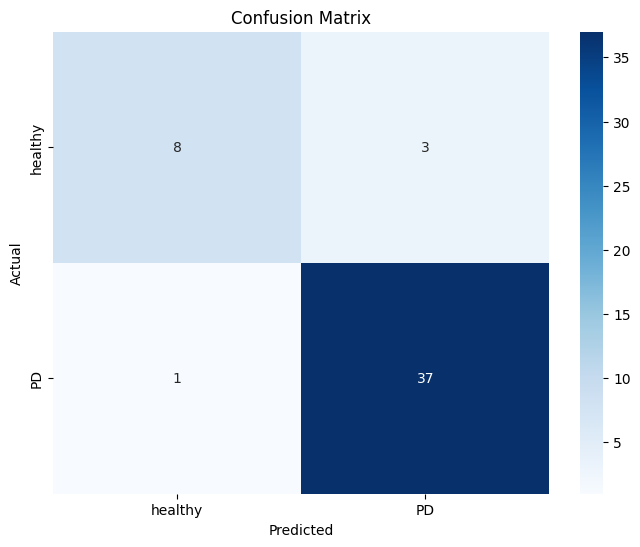

4
Logistic Regression model accuracy (in %): 91.83673469387756


In [79]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

# Prediction
y_pred = clf.predict(x_test)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['healthy', 'PD'], yticklabels=['healthy', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

false_val=(y_pred!=y_test).sum()
print(false_val)
#accuracy
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

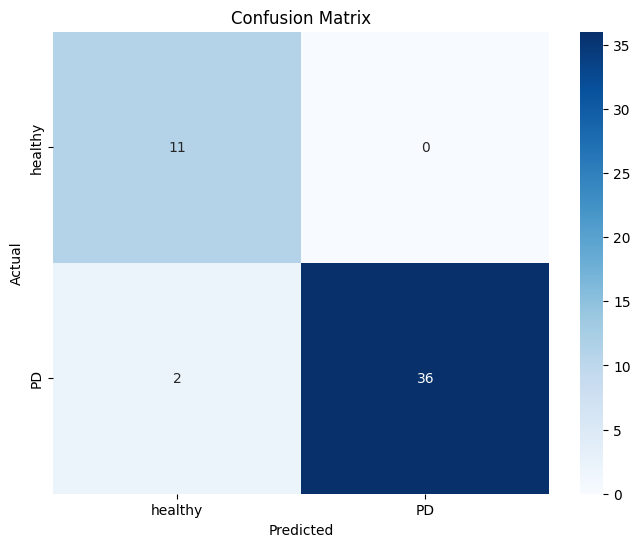

2
KNN model accuracy (in %): 95.91836734693877


In [80]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['healthy', 'PD'], yticklabels=['healthy', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

false_val=(y_pred!=y_test).sum()
print(false_val)

print("KNN model accuracy (in %):", acc*100)


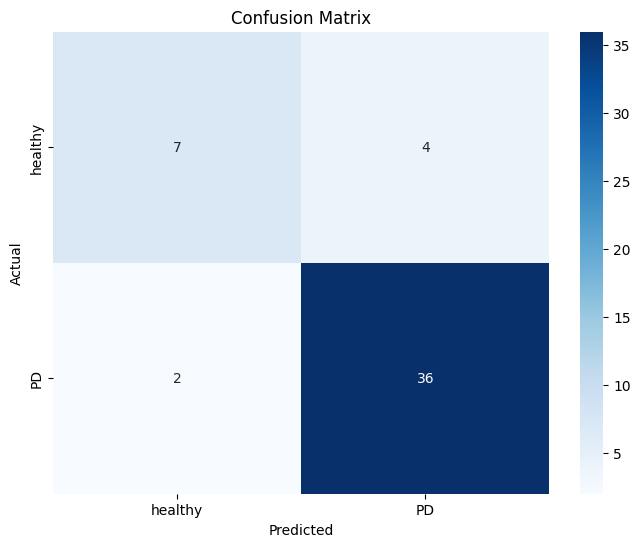

6
KNN model accuracy (in %): 87.75510204081633


In [81]:
#SVC
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['healthy', 'PD'], yticklabels=['healthy', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

false_val=(y_pred!=y_test).sum()
print(false_val)

print("SVC model accuracy (in %):", acc*100)

In [89]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(num_inputs=x_train.shape[1])

# Train the Perceptron on the training data
perceptron.fit(x_train, y_train, num_epochs=5)

# Prediction
pred = perceptron.predict(x_test)

# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(pred != y_test)
print("Accuracy:", accuracy)

ValueError: Provided coef_init does not match dataset.

In [90]:
pip install tensorflow

In [91]:
#Multilayer Perceptron
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
model = Sequential([
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(28, 28)),
      # dense layer 1
    Dense(256, activation='sigmoid'),
    # dense layer 2
    Dense(128, activation='sigmoid'),
      # output layer
    Dense(10, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#fitting and validating based on the number of epochs where each validation spilt of 0.2 and evaluating final results from all the epochs
model.fit(x_train, y_train, epochs=10,  batch_size=2000, validation_split=0.2)
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
24/24 [==============================] - 2s 62ms/step - loss: 1.6581 - accuracy: 0.6155 - val_loss: 1.0513 - val_accuracy: 0.8226
Epoch 2/10
24/24 [==============================] - 1s 53ms/step - loss: 0.8026 - accuracy: 0.8463 - val_loss: 0.5619 - val_accuracy: 0.8881
Epoch 3/10
24/24 [==============================] - 1s 52ms/step - loss: 0.4914 - accuracy: 0.8920 - val_loss: 0.3938 - val_accuracy: 0.9094
Epoch 4/10
24/24 [==============================] - 1s 52ms/step - loss: 0.3709 - accuracy: 0.9094 - val_loss: 0.3219 - val_accuracy: 0.9183
Epoch 5/10
24/24 [==============================] - 2s 86ms/step - loss: 0.3127 - accuracy: 0.9183 - val_loss: 0.2821 - val_accuracy: 0.9258
Epoch 6/10
24/24 [==============================] - 2s 72ms/step - loss: 0.2764 - accuracy: 0.9259 - val_loss: 0.2555 - val_accuracy: 0.9330
Epoch 7/10
24/24 [==============================] - 1s 52ms/step - loss: 0.2478 - accurac